### Inferential Statistics

What is the relationship between price and room type across neighbourhood and neighbourhood group?

Approach: Performing different hypothesis tests, tests of mean, tests of proportion, and tests of variance. Three assumptions must be checked (Normality of target variable, Randomness of sampling, and Equal Variance across categories). The level of significance is assumed to be 5 percent(alpha=0.5). If the assumptions are satisfied, parametric tests can be performed, else non-parametric have to be performed. Results of the tests performed will enable us to find association and dependability of different features on one-another.

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Read Data

In [2]:
location = 'C:/Users/cathe/projects/new-york-city-airbnb-open-data/'
df = pd.read_csv(location + 'AB_NYC_2019_clean.csv',header=0)

In [3]:
df.shape

(10922, 17)

In [4]:
df['price'].describe()

count    10922.000000
mean        52.638802
std         12.039530
min          0.000000
25%         45.000000
50%         53.000000
75%         62.000000
max         70.000000
Name: price, dtype: float64

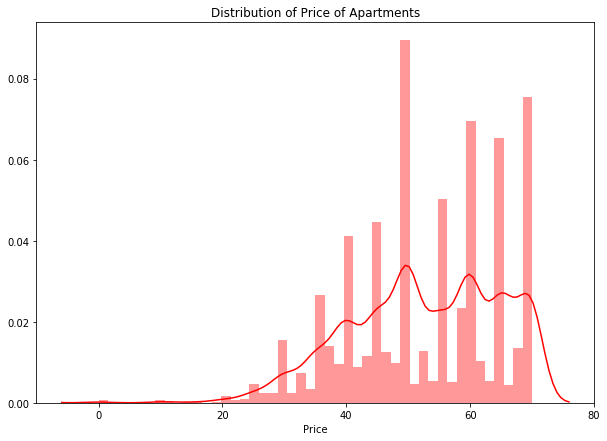

In [5]:
plt.figure(figsize=(10,7))
sns.distplot(df.price,color='r')
plt.xlabel("Price")
plt.title("Distribution of Price of Apartments")
plt.show()

### Checking for Normality with a Shapiro Test

Our null hypothesis($H_0$) is that the distribution is normal and our alternate hypothesis($H_A$) is that the distribution is not normal.

In [6]:
import scipy.stats as st
st.shapiro(df.price)

C:\Users\cathe\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9598557949066162, 0.0)

The p-value is 0 and less than alpha(0.5), so our null hypothesis is rejected. The distribution is not normal, so theoretically only non-parametric tests can be performed on the data.

### Price versus Room Type

In [7]:
df.room_type.unique()

array(['Private room', 'Shared room', 'Entire home/apt'], dtype=object)

In [8]:
private = df[df['room_type'] == 'Private room']
shared = df[df['room_type'] == 'Shared room']
apartment = df[df['room_type'] == 'Entire home/apt']

### Testing for variance with a Levene Test

The null hypothesis($H_0$) is that the variance across all different categories of room type are equal.
And the alternatve hypothesis($H_A$) is that the variance across all different categories of room type are not equal.

In [9]:
st.levene(private.price,shared.price,apartment.price)

LeveneResult(statistic=49.61921420134745, pvalue=3.5317216452802257e-22)

The p-value approximately zero and less than alpha, so the null hypothesis is rejected. Therefore, the variance of the price for room type is not equally the same.

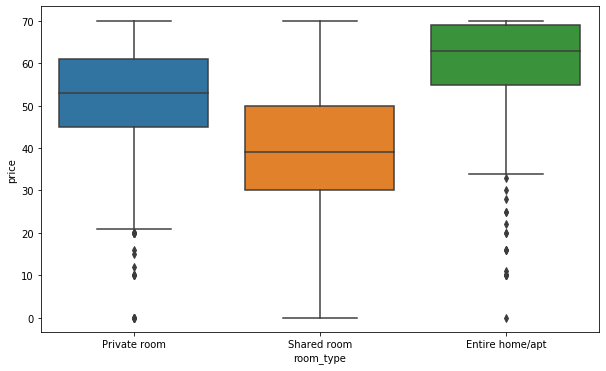

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(y='price',x='room_type',data=df)
plt.show()

### Kruskal Wallis Test
The null hypothesis($H_0$) is that the mean price across all different categories of room type are equal. And the alternate hypothesis($H_A$) is that the mean price across all different categories of room type are not equal.

In [11]:
st.kruskal(private.price,shared.price,apartment.price)

KruskalResult(statistic=742.9895655684982, pvalue=4.590561192620697e-162)

The p-value is less than alpha(0.05), therefore the null hypothesis is rejected. This implies that mean price across different apartments is not the same. We can confirm that from the barplot of the mean prices shown below.

In [12]:
ind = ['Private Rooms','Entire Home/Apartments','Shared Rooms']
x = pd.DataFrame([private.price.mean(),apartment.price.mean(),shared.price.mean()], index=ind)
x

,0
Private Rooms,52.883762
Entire Home/Apartments,59.867133
Shared Rooms,41.067797


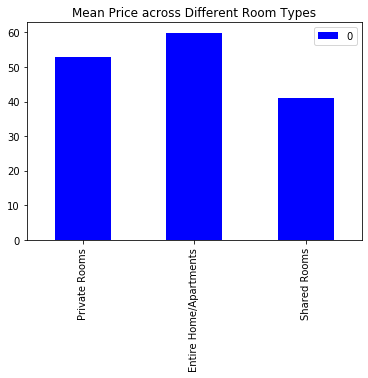

In [13]:
x.plot.bar(color='b')
plt.title('Mean Price across Different Room Types')
plt.show()

There is association between price and room type. Price is dependent on the type of room that a person chooses since the mean price across all types is not equal.

### One Way ANOVA
The null hypothesis($H_0$) is that the mean price across all different categories of room type are equal. And the alternate hypothesis($H_A$) is that the mean price across all different categories of room type are not equal. 

In [14]:
st.f_oneway(private.price,shared.price,apartment.price)

F_onewayResult(statistic=467.35135146471316, pvalue=1.791745132935069e-195)

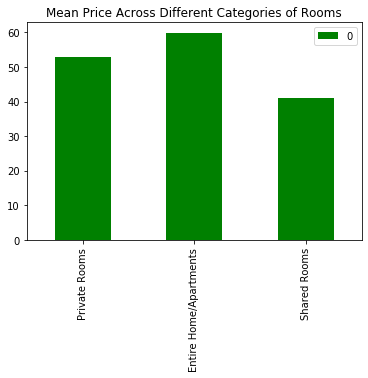

In [15]:
x.plot.bar(color='g')
plt.title('Mean Price Across Different Categories of Rooms')
plt.show()

In one way ANOVA also, p-value is less than alpha(0.05) and the null hypothesis is rejected which implies mean prices across different types of rooms are not the same.

### Price versus Neighbourhood

In [16]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

### Kruskal Wallis Test
$H_0$ (Null Hypothesis): Mean price across all neighbourhoods is all equal. $H_A$ (Alternative Hypothesis): Mean price across all neighbourhoods is not equal.

In [17]:
a = df[df['neighbourhood_group'] == 'Brooklyn']['price']
b = df[df['neighbourhood_group'] == 'Manhattan']['price']
c = df[df['neighbourhood_group'] == 'Queens']['price']
d = df[df['neighbourhood_group'] == 'Staten Island']['price']
e = df[df['neighbourhood_group'] == 'Bronx']['price']

st.kruskal(a,b,c,d,e)

KruskalResult(statistic=322.7141214508977, pvalue=1.3614136201687707e-68)

Since the p-value is close to zero and less than alpha(0.05), we reject the null hypothesis. Therefore, the mean price across the neighbourhood groups is not equal. 
We can conclude that there is association between price and neighbourhood group. Meaning the price is dependent on the neighbourhood group that the house is available in.

### One Way ANOVA
$H_0$ (Null Hypothesis): Mean price across all neighbourhoods is all equal. $H_A$ (Alternative Hypothesis): Mean price across all neighbourhoods is not equal.

In [18]:
st.f_oneway(a,b,c,d,e)

F_onewayResult(statistic=83.0146211738172, pvalue=1.5105613221877892e-69)

Since the p-value is close to zero and less than alpha(0.05), we reject the null hypothesis. Therefore, the mean price across different neighbourhood groups is not the same.

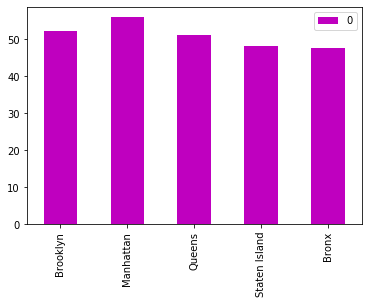

In [19]:
ind = ['Brooklyn','Manhattan','Queens','Staten Island','Bronx']
x = pd.DataFrame([a.mean(),b.mean(),c.mean(),d.mean(),e.mean()], index=ind)
x.plot.bar(color='m')
plt.show()

### Room Type versus Neighbourhood Group

### Chi Squared Test
$H_0$ (Null Hypothesis): There is no association between Room Type and Neighbourhood Group. $H_A$ (Alternative Hypothesis): There is an association between Room Type and Neighbourhood Group.

In [20]:
tab = pd.crosstab(df['room_type'], df['neighbourhood_group'])

In [21]:
st.chi2_contingency(tab)

(125.11958310910624,
 2.899677174117976e-23,
 8,
 array([[  32.99395715,  376.6810108 ,  147.42537997,  148.08002197,
            9.8196301 ],
        [ 441.05768174, 5035.40853324, 1970.75773668, 1979.50888116,
          131.26716719],
        [  29.94836111,  341.91045596,  133.81688335,  134.41109687,
            8.91320271]]))

The p-value(2.899e-23) is less than alpha(0.05), therefore the null hypothesis is rejected.

We can conclude there is an association between Room Type and Neighbourhood Group which implies that the proportion of availability of a particular room type(private, shared, apartment) is dependent on the neighbourhood group searched for.

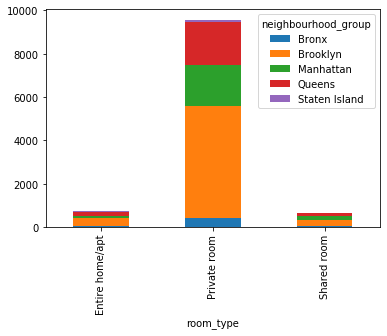

In [22]:
chi_test = pd.crosstab(df['room_type'],df['neighbourhood_group'])
chi_test.plot.bar(stacked=True)
plt.show()

### Price versus Neighbourhood Group & Host Name


### Two way ANOVA

#### Price versus Neighbourhood Group
$H_0$: Mean price across all neighbourhood groups is equal.
$H_A$: Mean price across all neighbourhood groups is not equal

#### Price versus Host Name
$H_0$: Mean price across all host names is equal.
$H_A$: Mean prices across all host names is not equal.

In [23]:
from statsmodels.formula.api import ols

In [24]:
model = ols("price~neighbourhood_group+host_name",data=df).fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     1.679
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           5.10e-79
Time:                        16:06:37   Log-Likelihood:                -38962.
No. Observations:               10919   AIC:                         8.592e+04
Df Residuals:                    6921   BIC:                         1.151e+05
Df Model:                        3997                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           42.3445     10.810      3.917      0.000      21.154      63.535
neighbourhood_group[T.Brooklyn]                      4.0214      0.829      4.852      0.000       2.397       5.646
neighbourhood_group[T.Manhattan]                     7.6555      0.857      8.933      0.000       5.976       9.335
neighbourhood_group[T.Queens]                        3.9918      0.883      4.521      0.000       2.261       5.723
neighbourhood_group[T.Staten Island]                 2.8775      1.616      1.781      0.075      -0.289       6.044
host_name[T.@ Art House Monique]                     3.6341     13.203      0.275      0.783     -22.248      29.516
host_name[T.A]                                      18.6637     15.247      1.224      0.221     -11.225      48.552
host_name[T.A. Nicholas]                          1.421e-14     15.239   9.33e-16      1.000     -29.873      29.873
host_name[T.A.B.]                                   -2.3363     13.206     -0.177      0.860     -28.225      23.552
host_name[T.AJ And Freddy]                          18.6341     15.244      1.222      0.222     -11.249      48.517
host_name[T.Aanchal]                                 5.0000     15.239      0.328      0.743     -24.873      34.873
host_name[T.Aaron]                                   5.8902     11.112      0.530      0.596     -15.892      27.672
host_name[T.Abbey]                                 -10.0000     15.239     -0.656      0.512     -39.873      19.873
host_name[T.Abby]                                   -6.0471     11.157     -0.542      0.588     -27.919      15.824
host_name[T.Abdes]                                  21.1341     13.203      1.601      0.109      -4.748      47.016
host_name[T.Abdoulaye]                              13.6637     15.247      0.896      0.370     -16.225      43.552
host_name[T.Abdul]                                  -2.3363     15.247     -0.153      0.878     -32.225      27.552
host_name[T.Abe]                                     7.6870     11.654      0.660      0.510     -15.158      30.532
host_name[T.Abel]                                   14.0000     15.239      0.919      0.358     -15.873      43.873
host_name[T.Abeni]                                   8.6341     15.244      0.566      0.571     -21.249      38.517
host_name[T.Abhi]                                   23.6637     15.247      1.552      0.121      -6.225      53.552
host_name[T.Abi]                                   -10.3363     15.247     -0.678      0.498     -40.225      19.552
host_name[T.Abigail]                                15.0000     15.239      0.984      0.325     -14.873      44.873
host_name[T.Abir]                        

In [26]:
from statsmodels.stats.anova import anova_lm
anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
neighbourhood_group,15996.312596,4.0,34.440759,1.640209e-28
host_name,732631.887119,3993.0,1.580154,7.915713e-62
Residual,803629.792739,6921.0,NaN,NaN


The p-values of host name and neighbourhood group are less than alpha (0.05). Therefore, mean price of rooms with different neighbourhood groups and host names are not equal.

We can conclude the mean price of a room has association with the name of its host and the neighbourhood group it belongs to. The price for a room with one host name in one neighbourhood group will be different from the price of a room with a different host name in a different neighbourhood group.

### Correlation Between Continuous Variables

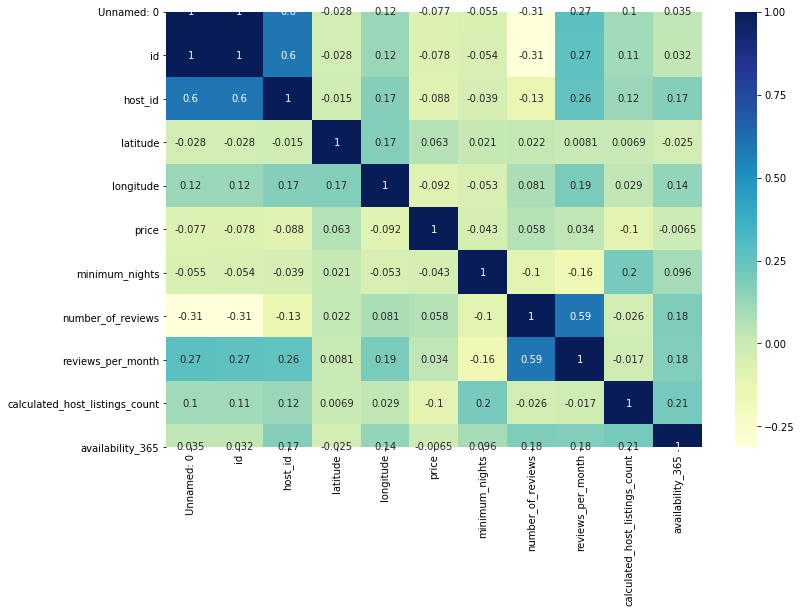

In [27]:
#A heatmap can be used to check for correlation between continuous variables in the dataset.
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

The highest correlation exists between host_id and id (0.6) closely followed number_of_reviews and reviews_per_month, while the lowest correlation exist between longitude and price (-.092).

### Neighbourhood versus Neighbourhood Group

### Chi-Squared Test

$H_0$: There is no association between neighbourhood and neighbourhood groups. $H_A$: There is an association between neighbourhood and neighbourhood groups.

In [28]:
tab = pd.crosstab(df['neighbourhood'],df['neighbourhood_group'])
st.chi2_contingency(tab)

(43687.99999999999,
 0.0,
 784,
 array([[9.22907892e-01, 1.05365318e+01, 4.12378685e+00, 4.14209852e+00,
         2.74674968e-01],
        [9.22907892e-02, 1.05365318e+00, 4.12378685e-01, 4.14209852e-01,
         2.74674968e-02],
        [4.61453946e-01, 5.26826589e+00, 2.06189343e+00, 2.07104926e+00,
         1.37337484e-01],
        [6.92180919e-01, 7.90239883e+00, 3.09284014e+00, 3.10657389e+00,
         2.06006226e-01],
        [1.30591467e+01, 1.49091925e+02, 5.83515840e+01, 5.86106940e+01,
         3.88665080e+00],
        [3.23017762e-01, 3.68778612e+00, 1.44332540e+00, 1.44973448e+00,
         9.61362388e-02],
        [1.38436184e-01, 1.58047977e+00, 6.18568028e-01, 6.21314778e-01,
         4.12012452e-02],
        [1.89196118e+00, 2.15998901e+01, 8.45376305e+00, 8.49130196e+00,
         5.63083684e-01],
        [4.61453946e-02, 5.26826589e-01, 2.06189343e-01, 2.07104926e-01,
         1.37337484e-02],
        [4.61453946e-02, 5.26826589e-01, 2.06189343e-01, 2.07104926e-01,
    

The null hypothesis is rejected since the p-value (0.0) is less than alpha (0.05). Therefore, there is an association between neighbourhood and neighbourhood group. This implies that the neighbourhood group is dependent upon the neighbourhood in which the house is present.